In [7]:
import pandas as pd
import warnings
from pandas import Series, DataFrame
warnings.filterwarnings("ignore")

In [2]:

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
def filter1(s,f):
    if s==f:
        return 0
    else:
        return float(s)
def transfrom(input_data):
    input_data['Coupon_requirement']=input_data['coupon_requirement'].map(lambda x: filter1(x,'null'))
    input_data['Equivalent_discount']=input_data['equivalent_discount'].map(lambda x: filter1(x,'fixed'))
    input_data['Fixed']=input_data['equivalent_discount'].map(lambda x: int(x=='fixed'))
    return input_data.drop(['coupon_requirement','equivalent_discount'],axis=1)

In [4]:

def fillna_pipeline(input_data):
    input_data=transfrom(input_data)
    input_data['Num_coupon_used'].fillna(0,inplace=True)
    input_data['Difference'].fillna(input_data['Difference'].mean(),inplace=True)
    input_data['money'].fillna(input_data['money'].mean(),inplace=True)
    input_data['Tot_coupon_sent'].fillna(input_data['Tot_coupon_sent'].mean(),inplace=True)
    input_data['num_type'].fillna(input_data['num_type'].mean(),inplace=True)
    input_data["Customer's Total Usage for Merchant's Coupons"].fillna(input_data["Customer's Total Usage for Merchant's Coupons"].mean(),inplace=True)
    input_data["Customer's Total Usage Fraction for Merchant"].fillna(input_data["Customer's Total Usage Fraction for Merchant"].mean(),inplace=True)
    input_data["Customer's Total Received by Merchant"].fillna(input_data["Customer's Total Received by Merchant"].mean(),inplace=True)
    input_data["Merchant's Total Usage Fraction"].fillna(input_data["Merchant's Total Usage Fraction"].mean(),inplace=True)
    input_data["Customer's Inbox Share by Merchant"].fillna(input_data["Customer's Inbox Share by Merchant"].mean(),inplace=True)
    print 'fill completed'
    return input_data

In [6]:
y_train1=pd.read_csv('y_train1.csv',header=None)
y_test1=pd.read_csv('y_test1.csv',header=None)

In [31]:
X_train1=fillna_pipeline(pd.read_csv('X_train1.csv'))
X_test1=fillna_pipeline(pd.read_csv('X_test1.csv'))

fill completed
fill completed


In [41]:
y_train2=pd.read_csv('y_train2.csv',header=None)
y_test2=pd.read_csv('y_test2.csv',header=None)
X_train2=fillna_pipeline(pd.read_csv('X_train2.csv'))
X_test2=fillna_pipeline(pd.read_csv('X_test2.csv'))

fill completed
fill completed


In [13]:
GBDT = GradientBoostingClassifier(n_estimators=150,max_depth=5 )
model=GBDT.fit(X_train1, y_train1)



In [14]:
y1_GBDTpredicted_test = GBDT.predict(X_test1)
metrics.accuracy_score(y_test1,y1_GBDTpredicted_test)

0.76818734241506281

In [15]:
score=GBDT.predict_proba(X_test1)

In [16]:
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])


AUC socre for GBDT is  0.834147037792


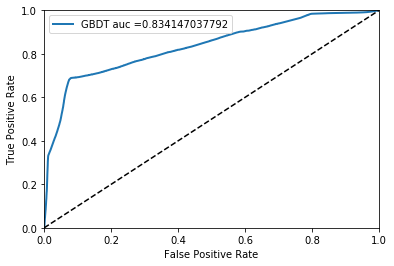

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT auc =', auc)
print 'AUC socre for GBDT is ', str(auc)

plt.legend(loc=0)

In [32]:
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(max_depth=15)
GBM_model=gbm.fit(X_train1, y_train1)

In [33]:
score1=GBM_model.predict_proba(X_test1)
score_XG=[]
for i in score1:
    score_XG.append(i[1])

In [42]:
gbm = xgb.XGBClassifier(max_depth=15)
GBM_model2=gbm.fit(X_train2, y_train2)

In [45]:
score2=GBM_model2.predict_proba(X_test2)
score_XG2=[]
for i in score2:
    score_XG2.append(i[1])

AUC socre for XG is  0.821755506446


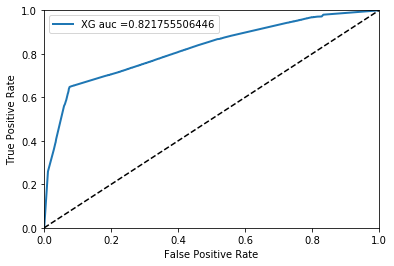

In [46]:
fpr, tpr, thresholds = roc_curve(y_test2, score_XG2)
auc = roc_auc_score(y_test2, score_XG2)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [37]:
GBM_model.feature_importances_

array([ 0.08081403,  0.14412491,  0.0836494 ,  0.02550601,  0.06086829,
        0.03541137,  0.01101005,  0.01968799,  0.08056854,  0.04426115,
        0.11624996,  0.1290275 ,  0.08286384,  0.08595697,  0.        ], dtype=float32)

AUC socre for XG is  0.959087730168


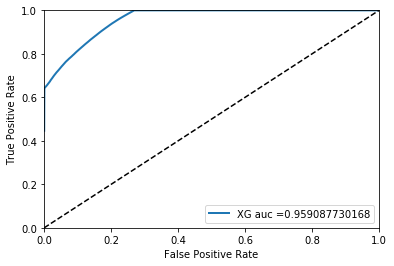

In [34]:
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [5]:
y_train=pd.read_csv('y_full_train.csv',header=None)
y_test=pd.read_csv('y_full_test.csv',header=None)
X_train=fillna_pipeline(pd.read_csv('X_full_train.csv'))
X_test=fillna_pipeline(pd.read_csv('X_full_test.csv'))

fill completed
fill completed


In [50]:
GBM_model2=gbm.fit(X_train, y_train)

Final Test set AUC socre for XG is  0.854786754456


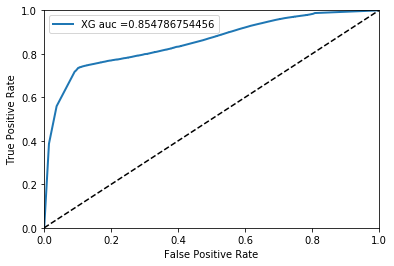

In [51]:
score2=GBM_model2.predict_proba(X_test)
score_XG2=[]
for i in score2:
    score_XG2.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_XG2)
auc = roc_auc_score(y_test, score_XG2)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'Final Test set AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [52]:
sorted(zip(X_train.columns,GBM_model2.feature_importances_),key=lambda x:x[1])

[('Fixed', 0.0),
 ("Customer's Total Usage for Merchant's Coupons", 0.015312243),
 ("Customer's Total Received by Merchant", 0.022561353),
 ("Customer's Total Usage Fraction for Merchant", 0.0381735),
 ('Num_coupon_used', 0.039930079),
 ('num_type', 0.057992872),
 ("Customer's Inbox Share by Merchant", 0.059929393),
 ('Coupon_requirement', 0.076843984),
 ("Merchant's Total Usage Fraction", 0.078369208),
 ('Equivalent_discount', 0.079166092),
 ('Tot_coupon_sent', 0.07972306),
 ('Date_received_week', 0.082173705),
 ('Difference', 0.10886516),
 ('money', 0.11460619),
 ('Date_received_month', 0.14635317)]

In [40]:
sorted(zip(X_train1.columns,GBM_model.feature_importances_),key=lambda x:x[1])

[('Fixed', 0.0),
 ("Customer's Total Usage for Merchant's Coupons", 0.011010053),
 ("Customer's Total Received by Merchant", 0.019687988),
 ('Num_coupon_used', 0.025506008),
 ("Customer's Total Usage Fraction for Merchant", 0.035411373),
 ("Customer's Inbox Share by Merchant", 0.044261146),
 ('num_type', 0.060868286),
 ("Merchant's Total Usage Fraction", 0.080568545),
 ('Date_received_week', 0.080814034),
 ('Coupon_requirement', 0.082863837),
 ('Tot_coupon_sent', 0.083649397),
 ('Equivalent_discount', 0.085956968),
 ('Difference', 0.11624996),
 ('money', 0.1290275),
 ('Date_received_month', 0.14412491)]

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'rank:pairwise',
    'eval_metric': 'auc',
    'gamma': 0.1,
    'min_child_weight': 1.1,
    'max_depth': 5,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.01,
    'tree_method': 'exact',
    'seed': 0,
    'nthread': 12
}

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob

In [150]:
Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train1)
sX_train1 = DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test1)
sX_test1 = DataFrame(sX_test1)

In [207]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,8,8,5), activation='relu', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05)

In [204]:
MLP_model=mlp.fit(sX_train1,y_train1)


In [205]:
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])

AUC socre for MLP is  0.579288474848


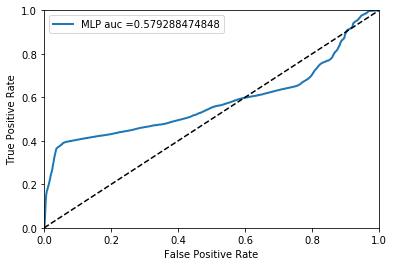

In [206]:
fpr, tpr, thresholds = roc_curve(y_test1, score_NN)
auc = roc_auc_score(y_test1, score_NN)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)
plt.legend(loc=0)

In [36]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

In [ ]:
ABC.fit(X_train, y_train)

AUC socre for AB is  0.825314185029


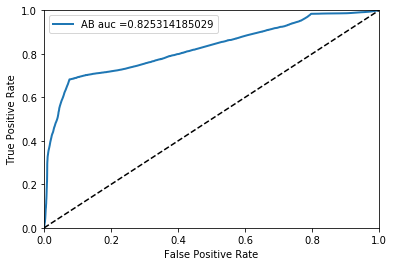

In [216]:
score3=ABC.predict_proba(X_test1)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_AB)
auc = roc_auc_score(y_test, score_AB)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)
plt.legend(loc=0)

In [8]:
from sklearn.svm import SVC


In [ ]:
GaussianSVC = SVC(kernel='rbf',C=0.5)
GaussianSVC.fit(X_train1, y_train1)

In [ ]:
score4=GaussianSVC.predict_proba(X_test1)
score_SVC=[]
for i in score4:
    score_SVC.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_SVC)
auc = roc_auc_score(y_test1, score_SVC)
plot_roc_curve(fpr, tpr, 'SVC auc =', auc)
print 'AUC socre for SVC is ', str(auc)
plt.legend(loc=0)

In [9]:
labels[:trainIndex].shape

NameError: name 'trainIndex' is not defined

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK
labels = y_train

In [24]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK
labels = y_train

minmaxscaler = MinMaxScaler()
attrs = minmaxscaler.fit_transform(X_train)

index = range(0,len(labels))
shuffle(index)
trainIndex = index[:int(len(labels)*0.7)]
print len(trainIndex)
testIndex = index[int(len(labels)*0.7):]
print len(testIndex)
attr_train = attrs[trainIndex]
print attr_train.shape
attr_test = attrs[testIndex]
print attr_test.shape
label_train = labels[0][trainIndex]
print len(label_train)
label_test = labels[0][testIndex]
print len(label_test)


def GBM(argsDict):
    max_depth = argsDict["max_depth"] + 5
    n_estimators = argsDict['n_estimators'] * 5 + 50
    learning_rate = argsDict["learning_rate"] * 0.02 + 0.05
    subsample = argsDict["subsample"] * 0.1 + 0.7
    min_child_weight = argsDict["min_child_weight"]+1
    print "max_depth:" + str(max_depth)
    print "n_estimator:" + str(n_estimators)
    print "learning_rate:" + str(learning_rate)
    print "subsample:" + str(subsample)
    print "min_child_weight:" + str(min_child_weight)
    global attr_train,label_train

    gbm = xgb.XGBClassifier(nthread=4,   
                            max_depth=max_depth,  
                            n_estimators=n_estimators,  
                            learning_rate=learning_rate, 
                            subsample=subsample,      
                            min_child_weight=min_child_weight,   
                            max_delta_step = 10,  
                            objective="binary:logistic")

    metric = cross_val_score(gbm,attr_train,label_train,cv=5,scoring="roc_auc").mean()
    print metric
    return -metric

space = {"max_depth":hp.randint("max_depth",15),
         "n_estimators":hp.randint("n_estimators",10),  #[0,1,2,3,4,5] -> [50,]
         "learning_rate":hp.randint("learning_rate",6),  #[0,1,2,3,4,5] -> 0.05,0.06
         "subsample":hp.randint("subsample",4),#[0,1,2,3] -> [0.7,0.8,0.9,1.0]
         "min_child_weight":hp.randint("min_child_weight",5), #
        }
algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(GBM,space,algo=algo,max_evals=4)

print best
print GBM(best)

467217
200236
(467217, 15)
(200236, 15)
467217
200236
max_depth:7
n_estimator:80
learning_rate:0.09
subsample:0.8
min_child_weight:3
0.991013897384
max_depth:13
n_estimator:80
learning_rate:0.09
subsample:0.8
min_child_weight:3
0.990542752151
max_depth:7
n_estimator:90
learning_rate:0.15
subsample:0.9
min_child_weight:3
0.991345698726
max_depth:7
n_estimator:90
learning_rate:0.15
subsample:0.9
min_child_weight:1


KeyboardInterrupt: 

In [ ]:
max_depth:7
n_estimator:90
learning_rate:0.15
subsample:0.9
min_child_weight:3

In [33]:
gbm = xgb.XGBClassifier(max_depth=10,n_estimator=50,learning_rate=0.15,subsample=0.9,min_child_weight=1)

In [34]:
GBM_model=gbm.fit(X_train, y_train)
score=GBM_model.predict_proba(X_test)
score_XG=[]
for i in score:
    score_XG.append(i[1])


Final Test set AUC socre for XG is  0.851923444817


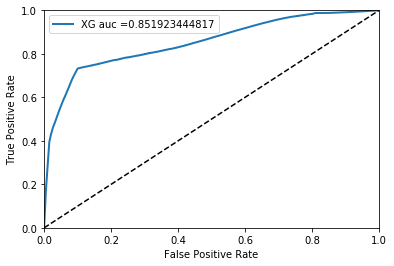

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
fpr, tpr, thresholds = roc_curve(y_test, score_XG)
auc = roc_auc_score(y_test, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'Final Test set AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'rank:pairwise',
    'eval_metric': 'auc',
    'gamma': 0.1,
    'min_child_weight': 1.1,
    'max_depth': 5,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.01,
    'tree_method': 'exact',
    'seed': 0,
    'nthread': 12
}